# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
import tkinter
from tkinter import *
from PIL import ImageTk, Image
import string

# Importing Data

In [2]:
data = pd.read_excel('OTF.xlsx') 
data.head()

,region,are_you_pregnant,discussion_includes_husband,gilr_referred_to_health_post_or_ msi_outreach_team_to_take_up_a_method,girl_age,location_of_smart_ start_follow_up,method_received,number_of_children,pregnancy_ test,referred_ by,session_type,used_ec_or_condoms_last_time_you_had_sex
0,Oromiya,UN - Unknown,No,No,19,Home,None,0,No - test given,WDA,Individual Session,None
1,Oromiya,N - Not pregnant,No,No,23,Home,None,2,No - test given,Navigator,Group Session,None
2,Oromiya,N - Not pregnant,No,Yes,20,Home,Implant 5 year Jadelle,1,No - test given,Navigator,Group Session,None
3,Oromiya,N - Not pregnant,No,Yes,24,Home,Implant 3 year Implanon,2,No - test given,HEW,Group Session,None
4,Oromiya,N - Not pregnant,Yes,Yes,19,Health Post,IUCD,1,No - test given,Navigator,Group Session,None


In [3]:
data.columns

Index(['region ', 'are_you_pregnant', 'discussion_includes_husband ',
       'gilr_referred_to_health_post_or_ msi_outreach_team_to_take_up_a_method',
       'girl_age', 'location_of_smart_ start_follow_up', 'method_received',
       'number_of_children', 'pregnancy_ test', 'referred_ by', 'session_type',
       'used_ec_or_condoms_last_time_you_had_sex'],
      dtype='object')

In [4]:
data.head()

,region,are_you_pregnant,discussion_includes_husband,gilr_referred_to_health_post_or_ msi_outreach_team_to_take_up_a_method,girl_age,location_of_smart_ start_follow_up,method_received,number_of_children,pregnancy_ test,referred_ by,session_type,used_ec_or_condoms_last_time_you_had_sex
0,Oromiya,UN - Unknown,No,No,19,Home,None,0,No - test given,WDA,Individual Session,None
1,Oromiya,N - Not pregnant,No,No,23,Home,None,2,No - test given,Navigator,Group Session,None
2,Oromiya,N - Not pregnant,No,Yes,20,Home,Implant 5 year Jadelle,1,No - test given,Navigator,Group Session,None
3,Oromiya,N - Not pregnant,No,Yes,24,Home,Implant 3 year Implanon,2,No - test given,HEW,Group Session,None
4,Oromiya,N - Not pregnant,Yes,Yes,19,Health Post,IUCD,1,No - test given,Navigator,Group Session,None


# Data preproccessing

# Data cleaning 

In [3]:
# Check missing

data.isnull().sum()

region                                                                    0
are_you_pregnant                                                          0
discussion_includes_husband                                               0
gilr_referred_to_health_post_or_ msi_outreach_team_to_take_up_a_method    0
girl_age                                                                  0
location_of_smart_ start_follow_up                                        0
method_received                                                           0
number_of_children                                                        0
pregnancy_ test                                                           0
referred_ by                                                              0
session_type                                                              0
used_ec_or_condoms_last_time_you_had_sex                                  0
dtype: int64

<AxesSubplot:>

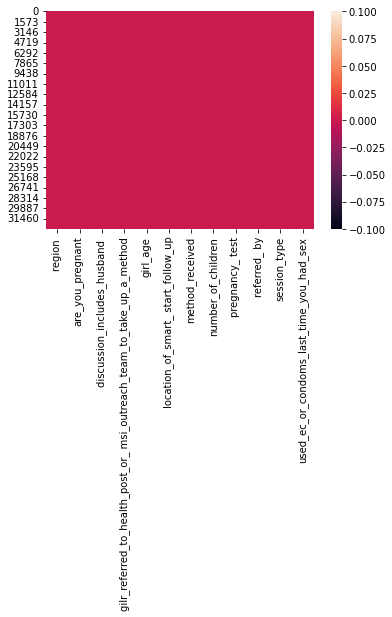

In [4]:
# Check missing graphically

sns.heatmap(data.isnull())

# Data transformation

# Modify and rename attribute name

In [5]:
data.columns

Index(['region ', 'are_you_pregnant', 'discussion_includes_husband ',
       'gilr_referred_to_health_post_or_ msi_outreach_team_to_take_up_a_method',
       'girl_age', 'location_of_smart_ start_follow_up', 'method_received',
       'number_of_children', 'pregnancy_ test', 'referred_ by', 'session_type',
       'used_ec_or_condoms_last_time_you_had_sex'],
      dtype='object')

In [6]:
data.rename(columns = {"gilr_referred_to_health_post_or_ msi_outreach_team_to_take_up_a_method":"Referred", "location_of_smart_ start_follow_up":"Premise", "pregnancy_ test":"P_test", "region ":"Region", "discussion_includes_husband ":"Hus", "referred_ by":"Referred_by", "girl_age":"Age", "method_received":"Method", "number_of_children":"Children", "referred_by":"Referred_by", "session_type":"S_type", "used_ec_or_condoms_last_time_you_had_sex":"CEC", "are_you_pregnant":"Pregnant"}, inplace= True)
data.columns

Index(['Region', 'Pregnant', 'Hus', 'Referred', 'Age', 'Premise', 'Method',
       'Children', 'P_test', 'Referred_by', 'S_type', 'CEC'],
      dtype='object')

# Modify and rename attribute value

In [7]:
data['Pregnant'].replace({'N - Not pregnant': 'NP','UN - Unknown': 'UN'}, inplace= True)

In [8]:
data['Referred_by'].replace({'Friend/peer': 'Friend/Peer'}, inplace= True)

# Convert Text categories in to numeric categories (Indexing)

In [9]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33012 entries, 0 to 33011
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       33012 non-null  object
 1   Pregnant     33012 non-null  object
 2   Hus          33012 non-null  object
 3   Referred     33012 non-null  object
 4   Age          33012 non-null  int64 
 5   Premise      33012 non-null  object
 6   Method       33012 non-null  object
 7   Children     33012 non-null  int64 
 8   P_test       33012 non-null  object
 9   Referred_by  33012 non-null  object
 10  S_type       33012 non-null  object
 11  CEC          33012 non-null  object
dtypes: int64(2), object(10)
memory usage: 20.9 MB


In [10]:
df=data
cols = ['Region', 'Pregnant', 'Hus', 'Age', 'Premise', 'Children', 'P_test', 'Referred_by', 'S_type', 'CEC', 'Referred', 'Method']
data = df[cols]
label_encoder = LabelEncoder()
data.Region = label_encoder.fit_transform(data['Region'])
data.Hus = label_encoder.fit_transform(data['Hus'])
data.Premise = label_encoder.fit_transform(data['Premise'])
data.Children = label_encoder.fit_transform(data['Children'])
data.P_test = label_encoder.fit_transform(data['P_test'])
data.Referred_by = label_encoder.fit_transform(data['Referred_by'])
data.S_type = label_encoder.fit_transform(data['S_type'])
data.CEC = label_encoder.fit_transform(data['CEC'])
data.Pregnant = label_encoder.fit_transform(data['Pregnant'])
data.Referred = label_encoder.fit_transform(data['Referred'])
data.Method = label_encoder.fit_transform(data['Method'])

In [11]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33012 entries, 0 to 33011
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Region       33012 non-null  int32
 1   Pregnant     33012 non-null  int32
 2   Hus          33012 non-null  int32
 3   Age          33012 non-null  int64
 4   Premise      33012 non-null  int32
 5   Children     33012 non-null  int64
 6   P_test       33012 non-null  int32
 7   Referred_by  33012 non-null  int32
 8   S_type       33012 non-null  int32
 9   CEC          33012 non-null  int32
 10  Referred     33012 non-null  int32
 11  Method       33012 non-null  int32
dtypes: int32(10), int64(2)
memory usage: 1.8 MB


In [12]:
data.memory_usage(deep=True)

Index             128
Region         132048
Pregnant       132048
Hus            132048
Age            264096
Premise        132048
Children       264096
P_test         132048
Referred_by    132048
S_type         132048
CEC            132048
Referred       132048
Method         132048
dtype: int64

In [12]:
data.head()

,Region,Pregnant,Hus,Age,Premise,Children,P_test,Referred_by,S_type,CEC,Referred,Method
0,0,1,0,19,1,0,0,5,1,0,0,5
1,0,0,0,23,1,2,0,4,0,0,0,5
2,0,0,0,20,1,1,0,4,0,0,1,3
3,0,0,0,24,1,2,0,2,0,0,1,2
4,0,0,1,19,0,1,0,4,0,0,1,1


In [13]:
df.head()

,Region,Pregnant,Hus,Referred,Age,Premise,Method,Children,P_test,Referred_by,S_type,CEC
0,Oromiya,UN,No,No,19,Home,None,0,No - test given,WDA,Individual Session,None
1,Oromiya,NP,No,No,23,Home,None,2,No - test given,Navigator,Group Session,None
2,Oromiya,NP,No,Yes,20,Home,Implant 5 year Jadelle,1,No - test given,Navigator,Group Session,None
3,Oromiya,NP,No,Yes,24,Home,Implant 3 year Implanon,2,No - test given,HEW,Group Session,None
4,Oromiya,NP,Yes,Yes,19,Health Post,IUCD,1,No - test given,Navigator,Group Session,None


# 1. girl referred to health post or msi outreach team to take up a method

# separate dependant and indpendant class

In [14]:
referred_x = data[["Region", "Hus", "Age", "Premise", "Children", "P_test", "Referred_by", "S_type", "CEC", "Pregnant"]]
referred_y = data[["Referred"]]

# Check Class Balance

In [15]:
df['Referred'].value_counts()

Yes    27561
No      5451
Name: Referred, dtype: int64

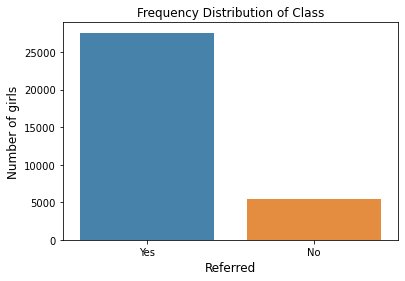

In [16]:
warnings.filterwarnings('ignore')
class_count = df['Referred'].value_counts()
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of Class')
plt.ylabel('Number of girls', fontsize=12)
plt.xlabel('Referred', fontsize=12)
plt.show()

# Apply over-sampling with smote

In [17]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
referred_smote_x,referred_smote_y= smote.fit_resample(referred_x,referred_y)

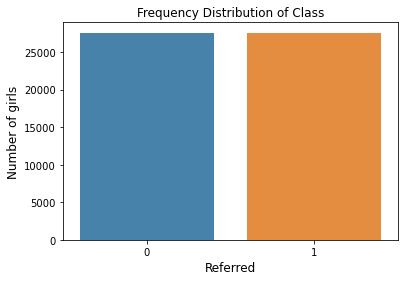

In [18]:
warnings.filterwarnings('ignore')
class_count = referred_smote_y['Referred'].value_counts()
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of Class')
plt.ylabel('Number of girls', fontsize=12)
plt.xlabel('Referred', fontsize=12)
plt.show()

# Split traing and test dataset

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(referred_x,referred_y,test_size=0.3,random_state=0)
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(referred_smote_x,referred_smote_y,test_size=0.3,random_state=0)

In [20]:
x_train.shape

(23108, 10)

In [21]:
x_train_smote.shape

(38585, 10)

# Select Algorithm

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
dt_clf = DecisionTreeClassifier()

In [23]:
#with unbalanced data
dt_clf.fit(referred_x,referred_y)
value=dt_clf.score(x_train,y_train)
value

0.8910334083434308

In [24]:
#balanced class with smote
dt_clf.fit(referred_x,referred_y)
value=dt_clf.score(x_train_smote,y_train_smote)
value

0.7417131009459634

# Cross Validation

In [25]:
# evaluate Models using 10-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [26]:
#with unbalanced data
dt_cv_accuracy = cross_val_score(dt_clf, x_train, y_train, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % dt_cv_accuracy)

Unbalanced Cross Validation Accuracy DT: 0.8549


In [27]:
#balanced class with smote
dt_cv_accuracy1 = cross_val_score(dt_clf, x_train_smote, y_train_smote, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % dt_cv_accuracy1)

Balanced Cross Validation Accuracy DT: 0.7988


# confusion matrix

In [28]:
import numpy as np
from sklearn.metrics import classification_report

predict=dt_clf.predict(x_test_smote)

print(classification_report(y_test_smote, predict))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67      8321
           1       0.66      0.96      0.79      8216

    accuracy                           0.74     16537
   macro avg       0.80      0.74      0.73     16537
weighted avg       0.80      0.74      0.73     16537



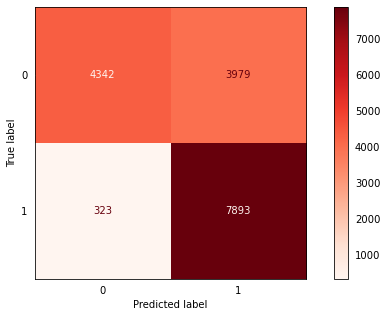

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(dt_clf,x_test_smote,y_test_smote,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier 
rand_forest =  RandomForestClassifier()
rand_forest.fit(referred_x,referred_y)

RandomForestClassifier()

In [31]:
#with unbalanced data
rand_forest.fit(referred_x,referred_y)
value=rand_forest.score(x_train,y_train)
value

0.8910334083434308

In [32]:
#balanced class with smote
rand_forest.fit(referred_x,referred_y)
value=rand_forest.score(x_train_smote,y_train_smote)
value

0.7300764545807956

# Cross Validation

In [33]:
#with unbalanced data
rand_forest_cv_accuracy = cross_val_score(rand_forest, x_train, y_train, cv=cv).mean()
print("Cross Validation Accuracy DT: %.4f" % rand_forest_cv_accuracy)

Cross Validation Accuracy DT: 0.8620


In [34]:
#balanced class with smote
rand_forest_cv_accuracy1 = cross_val_score(rand_forest, x_train_smote, y_train_smote, cv=cv).mean()
print("Cross Validation Accuracy DT: %.4f" % rand_forest_cv_accuracy1)

Cross Validation Accuracy DT: 0.7999


# comfusion matrix

In [35]:
predict=rand_forest.predict(x_test_smote)

print(classification_report(y_test_smote, predict))

              precision    recall  f1-score   support

           0       0.94      0.49      0.65      8321
           1       0.65      0.97      0.78      8216

    accuracy                           0.73     16537
   macro avg       0.80      0.73      0.71     16537
weighted avg       0.80      0.73      0.71     16537



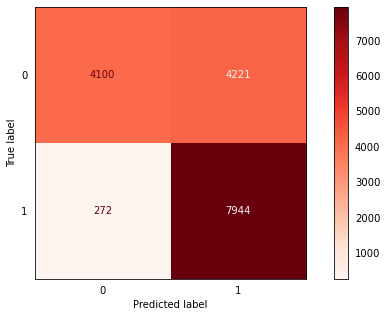

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(rand_forest,x_test_smote,y_test_smote,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()

# Gradiant Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbMod = GradientBoostingClassifier()
gbMod.fit(referred_x,referred_y)

GradientBoostingClassifier()

In [38]:
#with unbalanced data
gbMod.fit(referred_x,referred_y)
value=gbMod.score(x_train,y_train)
value

0.8669292020079626

In [39]:
#balanced class with smote
gbMod.fit(referred_x,referred_y)
value=gbMod.score(x_train_smote,y_train_smote)
value

0.6781132564468058

# Cross Validation

In [40]:
#with unbalanced data
gbMod_cv_accuracy = cross_val_score(gbMod, x_train, y_train, cv=cv).mean()
print("Cross Validation Accuracy DT: %.4f" % gbMod_cv_accuracy)

Cross Validation Accuracy DT: 0.8654


In [41]:
#balanced class with smote
gbMod_cv_accuracy = cross_val_score(gbMod, x_train_smote, y_train_smote, cv=cv).mean()
print("Cross Validation Accuracy DT: %.4f" % gbMod_cv_accuracy)

Cross Validation Accuracy DT: 0.7713


# confusion matrix

In [42]:
predict=gbMod.predict(x_test_smote)

print(classification_report(y_test_smote, predict))

              precision    recall  f1-score   support

           0       0.91      0.40      0.56      8321
           1       0.61      0.96      0.75      8216

    accuracy                           0.68     16537
   macro avg       0.76      0.68      0.65     16537
weighted avg       0.76      0.68      0.65     16537



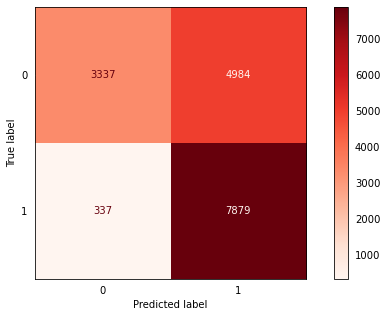

In [43]:
matrix=plot_confusion_matrix(gbMod,x_test_smote,y_test_smote,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()

# Multi-layer neural network

In [44]:
from sklearn.neural_network import MLPClassifier
mLPClassifier=MLPClassifier()
mLPClassifier.fit(referred_x,referred_y)

MLPClassifier()

In [45]:
#with unbalanced data
mLPClassifier.fit(referred_x,referred_y)
value=mLPClassifier.score(x_train,y_train)
value

0.8697853557209624

In [46]:
#balanced class with smote
mLPClassifier.fit(referred_x,referred_y)
value=mLPClassifier.score(x_train_smote,y_train_smote)
value

0.6900090708824673

# Cross Validation

In [47]:
#with unbalanced data
mLPClassifier_cv_accuracy = cross_val_score(mLPClassifier, x_train, y_train, cv=cv).mean()
print("Cross Validation Accuracy DT: %.4f" % mLPClassifier_cv_accuracy)

Cross Validation Accuracy DT: 0.8661


In [48]:
#balanced class with smote
mLPClassifier_cv_accuracy = cross_val_score(mLPClassifier, x_train_smote, y_train_smote, cv=cv).mean()
print("Cross Validation Accuracy DT: %.4f" % mLPClassifier_cv_accuracy)

Cross Validation Accuracy DT: 0.7726


# confusion matrix

In [49]:
predict=gbMod.predict(x_test_smote)

print(classification_report(y_test_smote, predict))

              precision    recall  f1-score   support

           0       0.91      0.40      0.56      8321
           1       0.61      0.96      0.75      8216

    accuracy                           0.68     16537
   macro avg       0.76      0.68      0.65     16537
weighted avg       0.76      0.68      0.65     16537



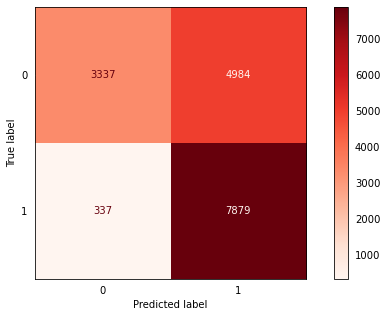

In [50]:
matrix=plot_confusion_matrix(gbMod,x_test_smote,y_test_smote,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()

# Apply Feature Selection

In [51]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(referred_x,referred_y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(referred_x.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables1 = selected_variables["input_variable"]
X_new = referred_x[selected_variables]
selected_variables1

9       Pregnant
5         P_test
0         Region
1            Hus
8            CEC
4       Children
6    Referred_by
3        Premise
7         S_type
Name: input_variable, dtype: object

In [52]:
referred_x = data[["Region", "Hus", "Premise", "Children", "P_test", "Referred_by", "S_type", "CEC", "Pregnant"]]
referred_y = data[["Referred"]]


x_train,x_test,y_train,y_test=train_test_split(referred_x,referred_y,test_size=0.3,random_state=0)
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(referred_smote_x,referred_smote_y,test_size=0.3,random_state=0)

# After applying feature selection

# Decision Tree

In [53]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(referred_x,referred_y)

#with unbalanced data
dt_cv_accuracy = cross_val_score(dt_clf, x_train, y_train, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % dt_cv_accuracy)

#balanced class with smote
dt_cv_accuracy1 = cross_val_score(dt_clf, x_train_smote, y_train_smote, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % dt_cv_accuracy1)

Unbalanced Cross Validation Accuracy DT: 0.8661
Balanced Cross Validation Accuracy DT: 0.7989


# Random Forest

In [54]:
rand_forest =  RandomForestClassifier()
rand_forest.fit(referred_x,referred_y)

#with unbalanced data
rand_forest_cv_accuracy = cross_val_score(rand_forest, x_train, y_train, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % rand_forest_cv_accuracy)

#balanced class with smote
rand_forest_cv_accuracy = cross_val_score(rand_forest, x_train_smote, y_train_smote, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % rand_forest_cv_accuracy)

Unbalanced Cross Validation Accuracy DT: 0.8670
Balanced Cross Validation Accuracy DT: 0.7994


# Gradiant Boosting

In [55]:
gbMod = GradientBoostingClassifier()
gbMod.fit(referred_x,referred_y)

#with unbalanced data
gbMod_cv_accuracy = cross_val_score(gbMod, x_train, y_train, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % gbMod_cv_accuracy)

#balanced class with smote
gbMod_cv_accuracy = cross_val_score(gbMod, x_train_smote, y_train_smote, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % gbMod_cv_accuracy)

Unbalanced Cross Validation Accuracy DT: 0.8644
Balanced Cross Validation Accuracy DT: 0.7713


# Multi-layer neural network

In [56]:
mLPClassifier=MLPClassifier()
mLPClassifier.fit(referred_x,referred_y)

#with unbalanced data
mLPClassifier_cv_accuracy = cross_val_score(mLPClassifier, x_train, y_train, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % mLPClassifier_cv_accuracy)

#balanced class with smote
mLPClassifier_cv_accuracy = cross_val_score(mLPClassifier, x_train_smote, y_train_smote, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % mLPClassifier_cv_accuracy)

Unbalanced Cross Validation Accuracy DT: 0.8670
Balanced Cross Validation Accuracy DT: 0.7700


# 2. contraceptive method received

# separate dependant and indpendant class

In [57]:
method_x = data[["Region", "Hus", "Age", "Premise", "Children", "P_test", "Referred_by", "S_type", "CEC", "Pregnant","Referred"]]
method_y = data[["Method"]]

# Check Class Balance

In [58]:
df['Method'].value_counts()

Implant 5 year Jadelle     11150
Implant 3 year Implanon     8470
Injection                   6292
None                        5451
Daily Pill                  1424
IUCD                         225
Name: Method, dtype: int64

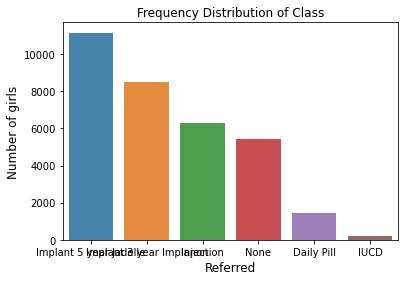

In [59]:
warnings.filterwarnings('ignore')
class_count = df['Method'].value_counts()
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of Class')
plt.ylabel('Number of girls', fontsize=12)
plt.xlabel('Referred', fontsize=12)
plt.show()

# Apply over-sampling with smote

In [60]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
method_smote_x,method_smote_y= smote.fit_resample(method_x,method_y)

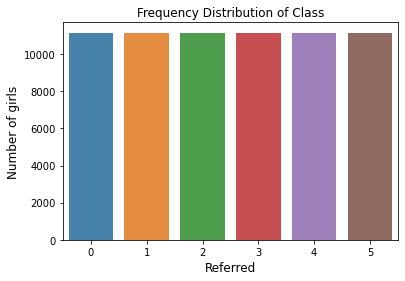

In [61]:
warnings.filterwarnings('ignore')
class_count = method_smote_y['Method'].value_counts()
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of Class')
plt.ylabel('Number of girls', fontsize=12)
plt.xlabel('Referred', fontsize=12)
plt.show()

# Split traing and test dataset

In [62]:
from sklearn.model_selection import train_test_split

x_train_method,x_test_method,y_train_method,y_test_method=train_test_split(method_x,method_y,test_size=0.3,random_state=0)
x_train_smote_method,x_test_smote_method,y_train_smote_method,y_test_smote_method=train_test_split(method_smote_x,method_smote_y,test_size=0.3,random_state=0)

# Select Algorithm

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
method_dt_clf = DecisionTreeClassifier()


In [64]:
#with unbalanced data
method_dt_clf.fit(method_x,method_y)
value=method_dt_clf.score(x_train_method,y_train_method)
value

0.6697680456984594

In [65]:
#balanced class with smote
method_dt_clf.fit(method_x,method_y)
value=method_dt_clf.score(x_train_smote_method,y_train_smote_method)
value

0.5174460815716421

# Cross Validation

In [66]:
#with unbalanced data
method_dt_cv_accuracy = cross_val_score(method_dt_clf, x_train_method, y_train_method, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % method_dt_cv_accuracy)

Unbalanced Cross Validation Accuracy DT: 0.5681


In [67]:
#balanced class with smote
method_dt_cv_accuracy1 = cross_val_score(method_dt_clf, x_train_smote_method, y_train_smote_method, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % method_dt_cv_accuracy1)

Balanced Cross Validation Accuracy DT: 0.6301


# confusion matrix

In [68]:
predict=method_dt_clf.predict(x_test_smote_method)

print(classification_report(y_test_smote_method, predict))

              precision    recall  f1-score   support

           0       0.83      0.17      0.29      3334
           1       0.97      0.15      0.26      3373
           2       0.40      0.48      0.44      3369
           3       0.34      0.81      0.48      3302
           4       0.46      0.50      0.48      3255
           5       1.00      1.00      1.00      3437

    accuracy                           0.52     20070
   macro avg       0.67      0.52      0.49     20070
weighted avg       0.67      0.52      0.49     20070



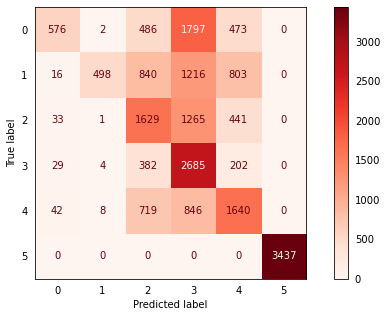

In [69]:
matrix=plot_confusion_matrix(method_dt_clf,x_test_smote_method,y_test_smote_method,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier 
method_rand_forest =  RandomForestClassifier()
method_rand_forest.fit(method_x,method_y)

RandomForestClassifier()

In [71]:
#with unbalanced data
method_rand_forest.fit(method_x,method_y)
value=method_rand_forest.score(x_train_method,y_train_method)
value

0.6700276960360049

In [72]:
#balanced class with smote
method_rand_forest.fit(method_x,method_y)
value=method_rand_forest.score(x_train_smote_method,y_train_smote_method)
value

0.5043988896006834

# Cross Validation

In [73]:
#with unbalanced data
method_rand_forest_accuracy = cross_val_score(method_rand_forest, x_train_method, y_train_method, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % method_rand_forest_accuracy)

Unbalanced Cross Validation Accuracy DT: 0.5777


In [74]:
#balanced class with smote
method_rand_forest_accuracy1 = cross_val_score(method_rand_forest, x_train_smote_method, y_train_smote_method, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % method_rand_forest_accuracy1)

Balanced Cross Validation Accuracy DT: 0.6338


# confusion matrix

In [75]:
predict=method_rand_forest.predict(x_test_smote_method)

print(classification_report(y_test_smote_method, predict))

              precision    recall  f1-score   support

           0       0.86      0.13      0.22      3334
           1       0.98      0.09      0.16      3373
           2       0.41      0.45      0.43      3369
           3       0.34      0.82      0.48      3302
           4       0.44      0.56      0.49      3255
           5       1.00      1.00      1.00      3437

    accuracy                           0.51     20070
   macro avg       0.67      0.51      0.46     20070
weighted avg       0.67      0.51      0.47     20070



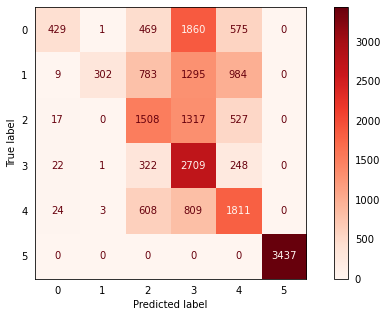

In [76]:

matrix=plot_confusion_matrix(method_rand_forest,x_test_smote_method,y_test_smote_method,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()

# Gradiant Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
method_gbMod = GradientBoostingClassifier()
method_gbMod.fit(method_x,method_y)

GradientBoostingClassifier()

In [78]:
#with unbalanced data
method_gbMod.fit(method_x,method_y)
value=method_gbMod.score(x_train_method,y_train_method)
value

0.6001384801800242

In [79]:
#balanced class with smote
method_gbMod.fit(method_x,method_y)
value=method_gbMod.score(x_train_smote_method,y_train_smote_method)
value

0.42808029041212897

# Cross Validation

In [80]:
#with unbalanced data
method_gbModt_accuracy = cross_val_score(method_gbMod, x_train_method, y_train_method, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % method_gbModt_accuracy)

Unbalanced Cross Validation Accuracy DT: 0.5952


In [81]:
#balanced class with smote
method_gbModt_accuracy1 = cross_val_score(method_gbMod, x_train_smote_method, y_train_smote_method, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % method_gbModt_accuracy1)

Balanced Cross Validation Accuracy DT: 0.5539


# confusion matrix

In [82]:
predict=method_gbMod.predict(x_test_smote_method)

print(classification_report(y_test_smote_method, predict))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3334
           1       1.00      0.02      0.03      3373
           2       0.30      0.29      0.30      3369
           3       0.30      0.82      0.44      3302
           4       0.33      0.44      0.38      3255
           5       1.00      1.00      1.00      3437

    accuracy                           0.43     20070
   macro avg       0.66      0.43      0.36     20070
weighted avg       0.66      0.43      0.36     20070



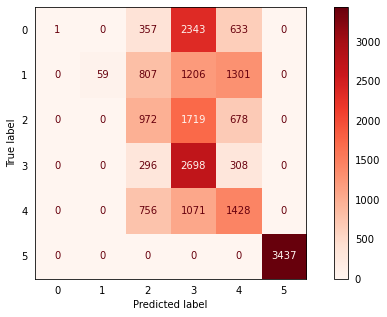

In [83]:

matrix=plot_confusion_matrix(method_gbMod,x_test_smote_method,y_test_smote_method,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()

# Multi-layer neural network

In [84]:
from sklearn.neural_network import MLPClassifier
method_mLPClassifier=MLPClassifier()
method_mLPClassifier.fit(method_x,method_y)

MLPClassifier()

In [85]:
#with unbalanced data
method_mLPClassifier.fit(method_x,method_y)
value=method_mLPClassifier.score(x_train_method,y_train_method)
value

0.6001384801800242

In [86]:
#balanced class with smote
method_mLPClassifier.fit(method_x,method_y)
value=method_mLPClassifier.score(x_train_smote_method,y_train_smote_method)
value

0.4332906256673073

# Cross Validation

In [87]:
#with unbalanced data
method_mLPClassifier_accuracy = cross_val_score(method_mLPClassifier, x_train_method, y_train_method, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % method_mLPClassifier_accuracy)

Unbalanced Cross Validation Accuracy DT: 0.5931


In [88]:
#balanced class with smote
method_mLPClassifier_accuracy1 = cross_val_score(method_mLPClassifier, x_train_smote, y_train_smote, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % method_mLPClassifier_accuracy1)

Balanced Cross Validation Accuracy DT: 0.7729


# confusion matrix

In [89]:
predict=method_gbMod.predict(x_test_smote_method)

print(classification_report(y_test_smote_method, predict))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3334
           1       1.00      0.02      0.03      3373
           2       0.30      0.29      0.30      3369
           3       0.30      0.82      0.44      3302
           4       0.33      0.44      0.38      3255
           5       1.00      1.00      1.00      3437

    accuracy                           0.43     20070
   macro avg       0.66      0.43      0.36     20070
weighted avg       0.66      0.43      0.36     20070



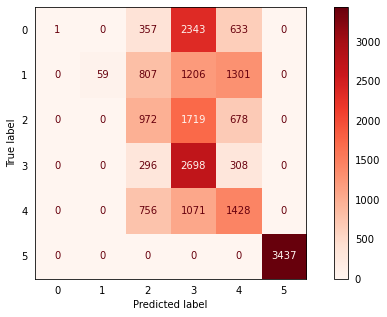

In [90]:

matrix=plot_confusion_matrix(method_gbMod,x_test_smote_method,y_test_smote_method,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()

# Apply Feature Selection

In [91]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(method_x,method_y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(method_x.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables1 = selected_variables["input_variable"]
X_new = method_x[selected_variables]
selected_variables1

0          Region
9        Pregnant
10       Referred
5          P_test
4        Children
1             Hus
6     Referred_by
7          S_type
8             CEC
3         Premise
2             Age
Name: input_variable, dtype: object

In [92]:
method_x = data[["Region", "Hus", "Premise", "Children", "P_test", "Referred_by", "S_type", "CEC", "Pregnant","Referred"]]
method_y = data[["Method"]]


x_train_method,x_test_method,y_train_method,y_test_method=train_test_split(method_x,method_y,test_size=0.3,random_state=0)
x_train_smote_method,x_test_smote_method,y_train_smote_method,y_test_smote_method=train_test_split(method_smote_x,method_smote_y,test_size=0.3,random_state=0)

# After applying feature selection

# Decision Tree

In [93]:
method_dt_clf = DecisionTreeClassifier()
method_dt_clf.fit(method_x,method_y)

#with unbalanced data
method_dt_cv_accuracy = cross_val_score(dt_clf, x_train_method, y_train_method, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % method_dt_cv_accuracy)

#balanced class with smote
method_dt_cv_accuracy1 = cross_val_score(dt_clf, x_train_smote_method, y_train_smote_method, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % method_dt_cv_accuracy1)


Unbalanced Cross Validation Accuracy DT: 0.5930
Balanced Cross Validation Accuracy DT: 0.6300


# Random Forest

In [94]:
method_rand_forest =  RandomForestClassifier()
method_rand_forest.fit(method_x,method_y)

#with unbalanced data
method_rand_forest_accuracy = cross_val_score(method_rand_forest, x_train_method, y_train_method, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % method_rand_forest_accuracy)


#balanced class with smote
method_rand_forest_accuracy1 = cross_val_score(method_rand_forest, x_train_smote_method, y_train_smote_method, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % method_rand_forest_accuracy1)

Unbalanced Cross Validation Accuracy DT: 0.5939
Balanced Cross Validation Accuracy DT: 0.6336


# Gradiant Boosting

In [95]:
method_gbMod = GradientBoostingClassifier()
method_gbMod.fit(method_x,method_y)

#with unbalanced data
method_gbModt_accuracy = cross_val_score(method_gbMod, x_train_method, y_train_method, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % method_gbModt_accuracy)

#balanced class with smote
method_gbModt_accuracy1 = cross_val_score(method_gbMod, x_train_smote_method, y_train_smote_method, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % method_gbModt_accuracy1)

Unbalanced Cross Validation Accuracy DT: 0.5987
Balanced Cross Validation Accuracy DT: 0.5539


# Multi-layer neural network

In [96]:
method_mLPClassifier=MLPClassifier()
method_mLPClassifier.fit(method_x,method_y)

#with unbalanced data
method_mLPClassifier_accuracy = cross_val_score(method_mLPClassifier, x_train_method, y_train_method, cv=cv).mean()
print("Unbalanced Cross Validation Accuracy DT: %.4f" % method_mLPClassifier_accuracy)

#balanced class with smote
method_mLPClassifier_accuracy1 = cross_val_score(method_mLPClassifier, x_train_smote_method, y_train_smote_method, cv=cv).mean()
print("Balanced Cross Validation Accuracy DT: %.4f" % method_mLPClassifier_accuracy1)

Unbalanced Cross Validation Accuracy DT: 0.5988
Balanced Cross Validation Accuracy DT: 0.5577


In [97]:
data.columns

Index(['Region', 'Pregnant', 'Hus', 'Age', 'Premise', 'Children', 'P_test',
       'Referred_by', 'S_type', 'CEC', 'Referred', 'Method'],
      dtype='object')

In [98]:
data['Region'].unique()

array([0, 2, 1])

In [99]:
data.head()

,Region,Pregnant,Hus,Age,Premise,Children,P_test,Referred_by,S_type,CEC,Referred,Method
0,0,1,0,19,1,0,0,5,1,0,0,5
1,0,0,0,23,1,2,0,4,0,0,0,5
2,0,0,0,20,1,1,0,4,0,0,1,3
3,0,0,0,24,1,2,0,2,0,0,1,2
4,0,0,1,19,0,1,0,4,0,0,1,1


# Prediction

In [100]:
# X1 = data3[["Region", "Hus", "Premise", "Children", "P_test", "Referred_by", "S_type", "CEC", "Pregnant", "Referred"]]
# Y1 = data3[["Method"]]
print(data['Method'].value_counts().sum())
data['Method'].count()
data['Referred'].value_counts()

33012


1    27561
0     5451
Name: Referred, dtype: int64

In [101]:
data['Referred'].value_counts()

1    27561
0     5451
Name: Referred, dtype: int64

In [102]:
data.columns

Index(['Region', 'Pregnant', 'Hus', 'Age', 'Premise', 'Children', 'P_test',
       'Referred_by', 'S_type', 'CEC', 'Referred', 'Method'],
      dtype='object')

In [103]:
new_data = [[0, 0, 1, 1, 0, 5, 1, 0,1,0]]
# 0=Daily Pill
# 1=IUCD        
# 2=Implant 3 year Implanon
# 3=Implant 5 year Jadelle
# 4=Injection
# 5=None

In [107]:
data.columns

Index(['Region', 'Pregnant', 'Hus', 'Age', 'Premise', 'Children', 'P_test',
       'Referred_by', 'S_type', 'CEC', 'Referred', 'Method'],
      dtype='object')

In [108]:
df['CEC'].unique()

array(['None', 'Used Condoms', 'Used EC'], dtype=object)

In [109]:
data['Region'].value_counts()

1    14608
0    13482
2     4922
Name: Region, dtype: int64

In [110]:
df['Region'].value_counts()

SNNP       14608
Oromiya    13482
Sidama      4922
Name: Region, dtype: int64

In [111]:
data['Hus'].value_counts()

0    19985
1    13027
Name: Hus, dtype: int64

In [112]:
df['Hus'].value_counts()

No     19985
Yes    13027
Name: Hus, dtype: int64

In [113]:
data['Children'].value_counts()

2    8948
1    8842
3    7871
4    4922
0    2429
Name: Children, dtype: int64

In [114]:
df['Children'].value_counts()

2    8948
1    8842
3    7871
4    4922
0    2429
Name: Children, dtype: int64

In [115]:
df['S_type'].value_counts()

Group Session         20092
Individual Session    12920
Name: S_type, dtype: int64

In [116]:
data['S_type'].value_counts()

0    20092
1    12920
Name: S_type, dtype: int64

In [117]:
df['Pregnant'].value_counts()

NP    26943
UN     6069
Name: Pregnant, dtype: int64

In [118]:
data['Pregnant'].value_counts()

0    26943
1     6069
Name: Pregnant, dtype: int64

In [119]:
# X = data3[["Region", "Hus", "Premise", "Children", "P_test", "Referred_by", "S_type", "CEC", "Pregnant"]]
# Y = data3[["Referred"]]

# X1 = data3[["Region", "Hus", "Premise", "Children", "P_test", "Referred_by", "S_type", "CEC", "Pregnant", "Referred"]]
# Y1 = data3[["Method"]]

def pridictReferred(Region,Hus,Premise,Children,P_test,Referred_by,S_type,CEC,Pregnant):
    
    data=[]
    
    data.append(Region) 
    
    data.append(Hus)
    
    data.append(Premise)
    
    data.append(Children)
    
    data.append(P_test)
    
    data.append(Referred_by)
    
    data.append(S_type)
    
    data.append(CEC)
    
    data.append(Pregnant)
    
    result=rand_forest.predict([data])
    return result

def pridictMethod(Region,Hus,Premise,Children,P_test,Referred_by,S_type,CEC,Pregnant,Referred):
    
    data=[]
    
    data.append(Region) 
    
    data.append(Hus)
    
    data.append(Premise)
    
    data.append(Children)
    
    data.append(P_test)
    
    data.append(Referred_by)
    
    data.append(S_type)
    
    data.append(CEC)
    
    data.append(Pregnant)
    
    data.append(Referred)
    
    result=method_rand_forest.predict([data])
    return result
    
# 'N_Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','Tiketed_Date'    
def dataPredictor():
    
    regions=["Oromiya","SNNP","Sidama"]
   
    i=1
    for region in regions:
        if(region==regionmenu.get()):
            Region=i
        i=i+1
        
    if(discussion_includes_husbandmenu.get()=="YES"):
        Hus=1       
    else:
        Hus=0 
        
    Premises=["Health Post","Home","Meeting hall"]
   
    i=1
    for premise in Premises:
        if(premise==Follow_up_locationlblmenu.get()):
            Premise=i
        i=i+1    
        
    NumChildren=["0","1","2","3","4"]
    
    i=1
    for child in NumChildren:
        if(child==number_of_childrenlblmenu.get()):
            Children=i
        i=i+1  
        
    if(discussion_includes_husbandmenu.get()=="YES"):
        P_test=1       
    else:
        P_test=0 
        
    Referreds=['WDA', 'Navigator', 'HEW', 'Husband', 'Friend/peer']
    
    i=1
    for referred in Referreds:
        if(referred==referred_bylblmenu.get()):
            Referred_by=i
        i=i+1  

        
    if(discussion_includes_husbandmenu.get()=="Individual Session"):
        S_type=1       
    else:
        S_type=0   

    CECs=['None', 'Used Condoms', 'Used EC']  
    
    i=1
    for cec in CECs:
        if(cec==CEClblmenu.get()):
            CEC=i
        i=i+1 
    if(discussion_includes_husbandmenu.get()=="YES"):
        P_test=1       
    else:
        P_test=0 
    if(are_you_pregnantmenu.get()=="Unknown"):
        Pregnant=1       
    else:
        Pregnant=0 
    
    referredResult=pridictReferred(Region,Hus,Premise,Children,P_test,Referred_by,S_type,CEC,Pregnant)
    if(referredResult[0]==0):
        ReferredlblMessege.config(text="The Referred is NO")
        
    elif(referredResult[0]==1):
        ReferredlblMessege.config(text="The Referred is YES")
        
    methodResult=pridictMethod(Region,Hus,Premise,Children,P_test,Referred_by,S_type,CEC,Pregnant,referredResult[0])
    
    if(methodResult[0]==0):
        
        MethodlblMessege.config(text="The Method is Daily Pill")
        
    elif(methodResult[0]==1):
        
        MethodlblMessege.config(text="The Method is IUCD")
        
    elif(methodResult[0]==2):
        
        MethodlblMessege.config(text="The Method is Implant 3 year Implanon")
        
    elif(methodResult[0]==3):
        
        MethodlblMessege.config(text="The Method is Implant 5 year Jadelle")
        
    elif(methodResult[0]==4):
        
        MethodlblMessege.config(text="The Method is Injection")
        
    elif(methodResult[0]==5):
        
        MethodlblMessege.config(text="The Method is None")
        
def ErrorMessage(message):
    
    lblError.config(text=message)
window = Tk()


window.title("Welcome to refferd and method prediction system ")

window.geometry('1000x600')

lbl1 = Label(window, text="Let us predict refferd and method ",font=(50),fg="green")

lbl1.grid(column=1, row=1,padx=10, pady=10)


regionlbl = Label(window, text="Region",font=(12),fg="green", anchor="w", width=15)

regionlbl.grid(column=0, row=4,padx=0, pady=10)

regionlbl.grid(column=0, row=4,padx=0, pady=10)


regionmenu= StringVar()

regionmenu.set("Oromiya")

drop= OptionMenu(window, regionmenu, "Oromiya", "Sidama","SNNP")

drop.grid(row=4, column=1,padx=20, pady=10)

drop.config(width = 25)

drop.config(bg = "White")
drop.grid()


are_you_pregnantlbl = Label(window, text="Are you pregnant",font=(12),fg="green",anchor="w", width=15)

are_you_pregnantlbl.grid(column=0, row=5,padx=0, pady=5)

are_you_pregnantlbl.grid(column=0, row=5,padx=0, pady=5)


are_you_pregnantmenu= StringVar()

are_you_pregnantmenu.set("Unknown")

drop= OptionMenu(window, are_you_pregnantmenu, "Unknown", "Not pregnant")

drop.grid(row=5, column=1,padx=20, pady=10)

drop.config(width = 25)

drop.config(bg = "White")

drop.grid()



discussion_includes_husbandlbl = Label(window, text="Discussion includes husband",font=(12),fg="green",anchor="w", width=15)

discussion_includes_husbandlbl.grid(column=0, row=6,padx=20, pady=2)

discussion_includes_husbandlbl.grid(column=0, row=6,padx=20, pady=2)


discussion_includes_husbandmenu= StringVar()

discussion_includes_husbandmenu.set("YES")

drop= OptionMenu(window, discussion_includes_husbandmenu, "YES", "NO")

drop.grid(row=6, column=1,padx=20, pady=10)

drop.config(width = 25)

drop.config(bg = "White")

drop.grid()


Follow_up_locationlbl = Label(window, text="Follow up location",font=(12),fg="green",anchor="w", width=15)

Follow_up_locationlbl.grid(column=0, row=7,padx=20, pady=2)

Follow_up_locationlbl.grid(column=0, row=7,padx=20, pady=2)


Follow_up_locationlblmenu= StringVar()

Follow_up_locationlblmenu.set("Home")

drop= OptionMenu(window, Follow_up_locationlblmenu, "Home","Health Post","Meeting hall")

drop.grid(row=7, column=1,padx=20, pady=10)

drop.config(width = 25)

drop.config(bg = "White")

drop.grid()


number_of_childrenlbl = Label(window, text="number of children",font=(12),fg="green",anchor="w", width=15)

number_of_childrenlbl.grid(column=0, row=8,padx=20, pady=2)

number_of_childrenlbl.grid(column=0, row=8,padx=20, pady=2)

number_of_childrenlblmenu= StringVar()

number_of_childrenlblmenu.set("0")

drop= OptionMenu(window, number_of_childrenlblmenu, "0", "1","2","3","4")

drop.grid(row=8, column=1)

drop.config(width = 25)

drop.config(bg = "White")

drop.grid()


pregnancy_testlbl = Label(window, text="pregnancy test",font=(12),fg="green",anchor="w", width=15)

pregnancy_testlbl.grid(column=0, row=9,padx=20, pady=2)

pregnancy_testlbl.grid(column=0, row=9,padx=20, pady=2)


pregnancy_testlblmenu= StringVar()

pregnancy_testlblmenu.set("No-test given")

drop= OptionMenu(window, pregnancy_testlblmenu, 'No-test given', 'Tested-negative')

drop.grid(row=9, column=1,padx=20, pady=10)

drop.config(width = 25)

drop.config(bg = "White")

drop.grid()


referred_bylbl = Label(window, text="Referred by",font=(12),fg="green",anchor="w", width=15)

referred_bylbl.grid(column=0, row=10,padx=20, pady=2)

referred_bylbl.grid(column=0, row=10,padx=20, pady=2)

referred_bylblmenu= StringVar()

referred_bylblmenu.set("Navigator")

drop= OptionMenu(window, referred_bylblmenu, 'WDA', 'Navigator', 'HEW', 'Husband', 'Friend/peer',
       'Community Leader', 'Friend/Peer')

drop.grid(row=10, column=1,padx=20, pady=10)

drop.config(width = 25)

drop.config(bg = "White")

drop.grid()

Sessionlbl = Label(window, text="Session type",font=(12),fg="green",anchor="w", width=15)

Sessionlbl.grid(column=0, row=11,padx=20, pady=2)

Sessionlbl.grid(column=0, row=11,padx=20, pady=2)


Sessionlblmenu= StringVar()

Sessionlblmenu.set("Individual Session")

drop= OptionMenu(window, Sessionlblmenu,'Individual Session', 'Group Session')

drop.grid(row=11, column=1,padx=20, pady=10)

drop.config(width = 25)

drop.config(bg = "White")

drop.grid()


CEClbl = Label(window, text="CEC",font=(12),fg="green",anchor="w", width=15)

CEClbl.grid(column=0, row=12,padx=20, pady=2)

CEClbl.grid(column=0, row=12,padx=20, pady=2)


CEClblmenu= StringVar()

CEClblmenu.set("None")

drop= OptionMenu(window, CEClblmenu,'None', 'Used Condoms', 'Used EC')

drop.grid(row=12, column=1,padx=20, pady=10)

drop.config(width = 25)

drop.config(bg = "White")

drop.grid()

btn = Button(window, text="pridict",font=(12), command=dataPredictor, bg="green", fg="white",anchor="e")
# btn = Button(window, text="pridict",font=(12), bg="green", fg="white")

btn.grid(column=1, row=13,padx=0)

ReferredlblMessege=Label(window, text=" ",font=(18), fg="blue", anchor="w", width=30)

ReferredlblMessege.grid(column=2, row=4,padx=20, pady=0)

MethodlblMessege=Label(window, text=" ",font=(18), fg="blue",anchor="w", width=30)

MethodlblMessege.grid(column=2, row=5,padx=20, pady=0)


window.mainloop()

